## Regression Analysis - Housing Price Prediction

### Problem Statement :
Apply various Regression Models for the House Price Prediction which will predict the price of the houses in future depending on the parameters.

#### What Kind Of Approach You Could Follow for your Problem Statements :

Reading the Data, Understanding the Data, Exploratory Data Analysis, Data Visualization, Splitting the Data, Training and Testing, Modeling, Accuracy

Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [130]:
data = pd.read_csv('kc_house_data.csv')

In [131]:
pd.set_option('display.max_columns', None)

In [132]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [134]:
data['date'] = pd.to_datetime(data['date'])

In [135]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [136]:
data.duplicated().sum()

0

In [137]:
data.isna().sum().sum()

0

<AxesSubplot:xlabel='price'>

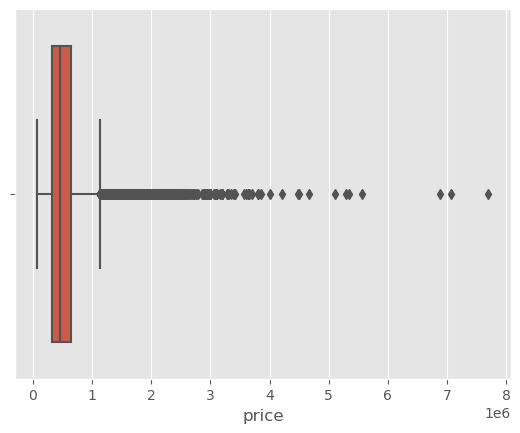

In [138]:
sns.boxplot(data['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

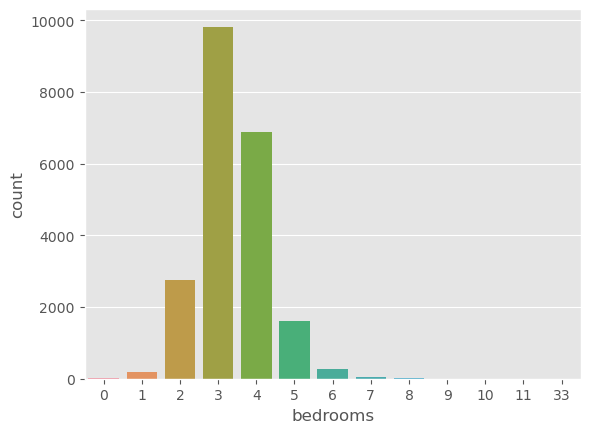

In [139]:
sns.countplot(data['bedrooms'])

In [140]:
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [141]:
data[data['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


<AxesSubplot:xlabel='bathrooms'>

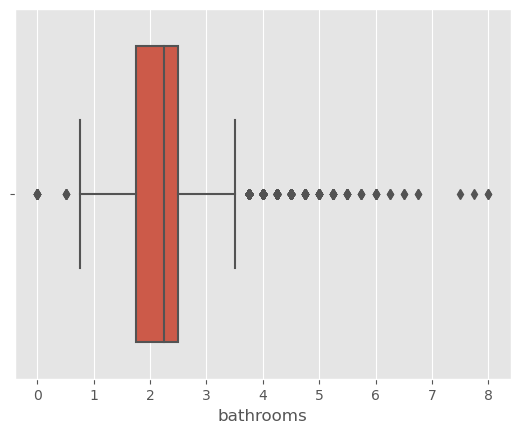

In [142]:
sns.boxplot(data['bathrooms'])

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

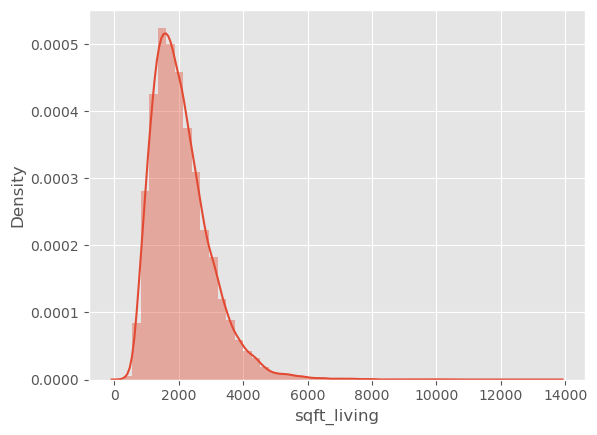

In [143]:
sns.distplot(data['sqft_living'])

In [144]:
#removing property with 33 bedrooms

In [145]:
data.drop(15870, inplace = True)

<AxesSubplot:xlabel='floors', ylabel='count'>

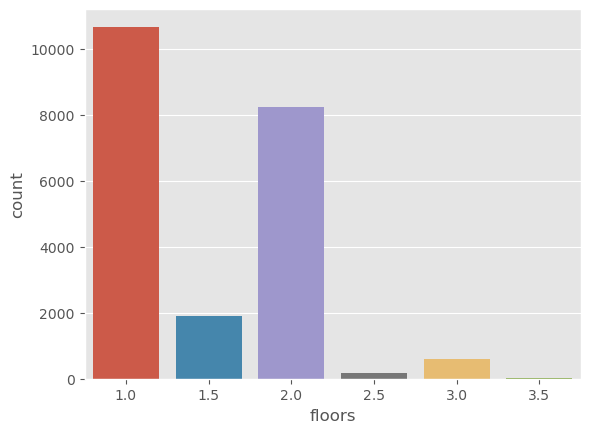

In [146]:
sns.countplot(data['floors'])

<AxesSubplot:xlabel='view', ylabel='count'>

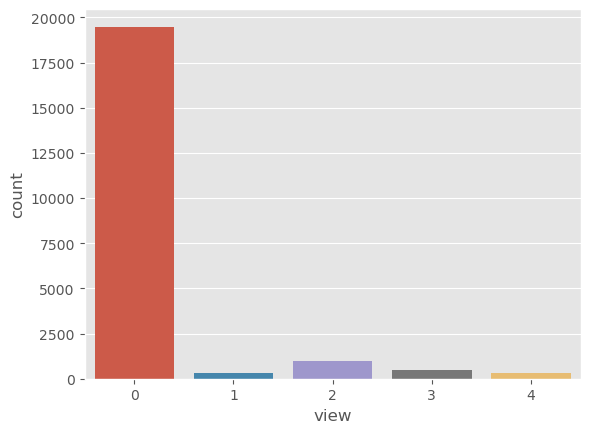

In [147]:
sns.countplot(data['view'])

In [148]:
data = data.drop_duplicates(subset=['id'], keep='last') # removing rows with duplicate id 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

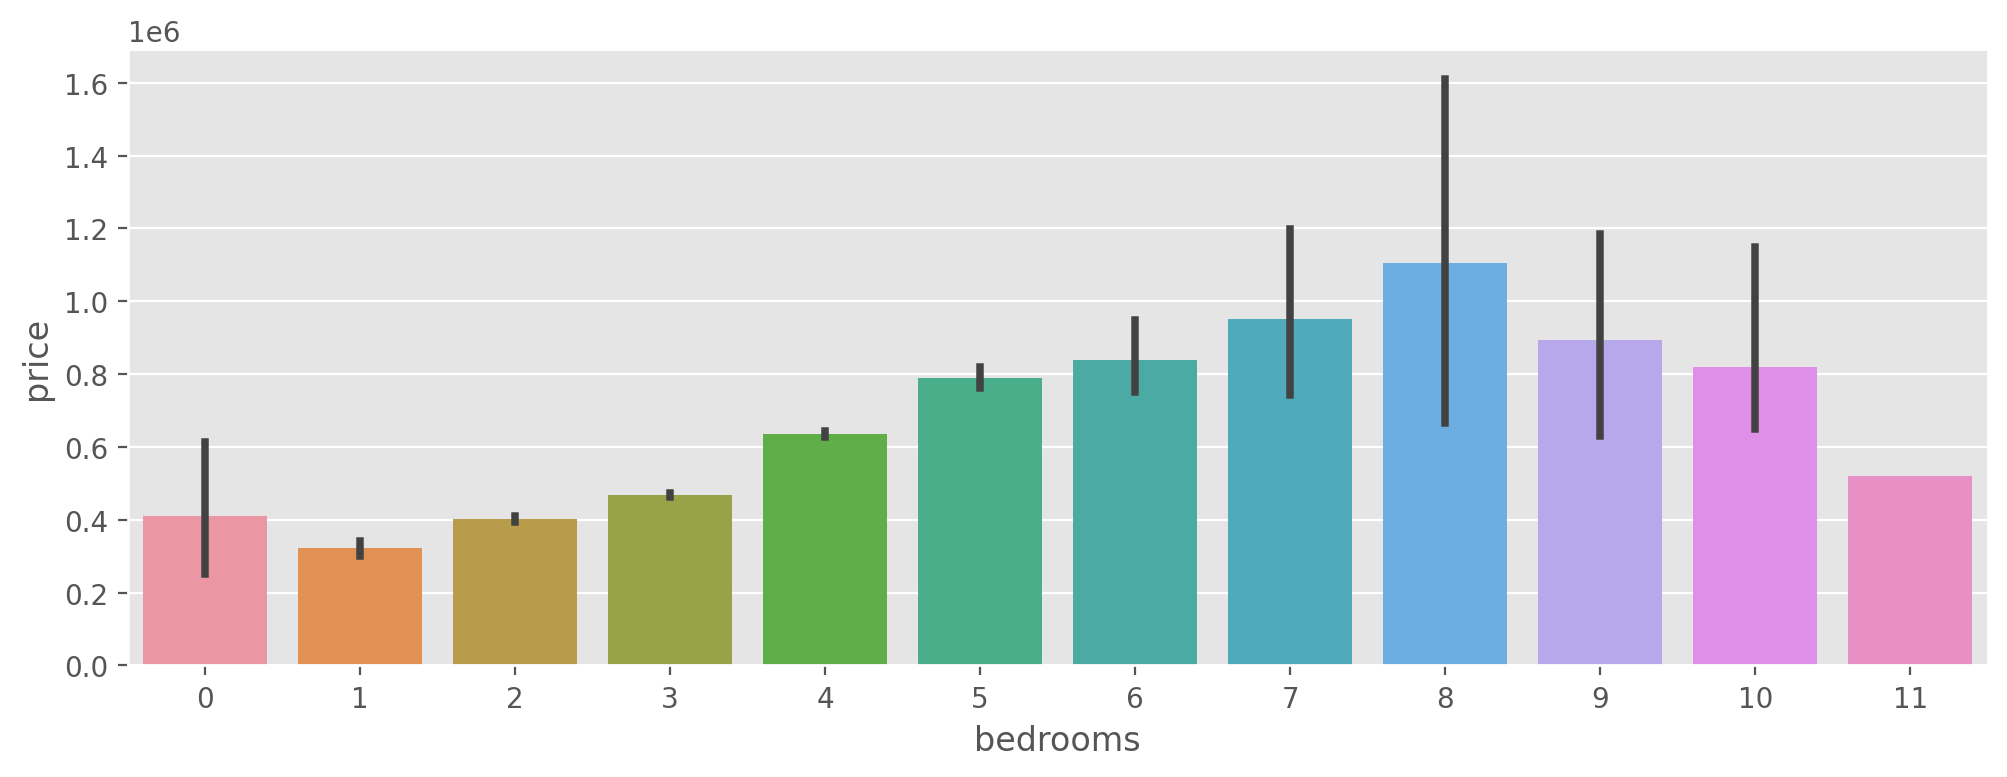

In [149]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot(data['bedrooms'], data['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

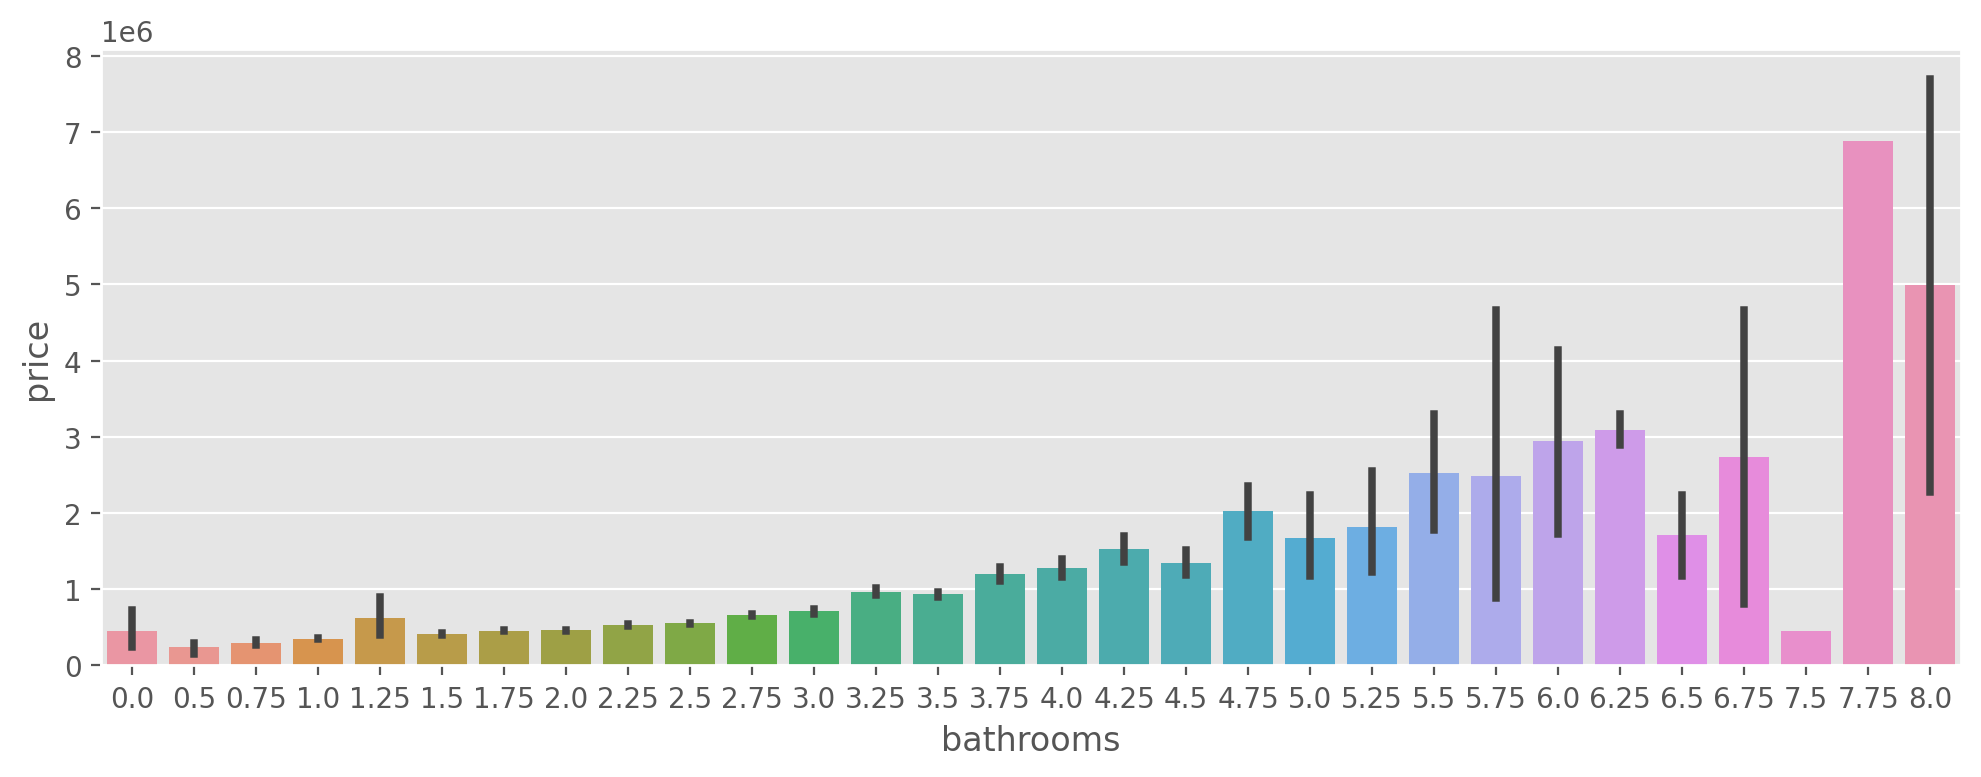

In [150]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot(data['bathrooms'], data['price'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

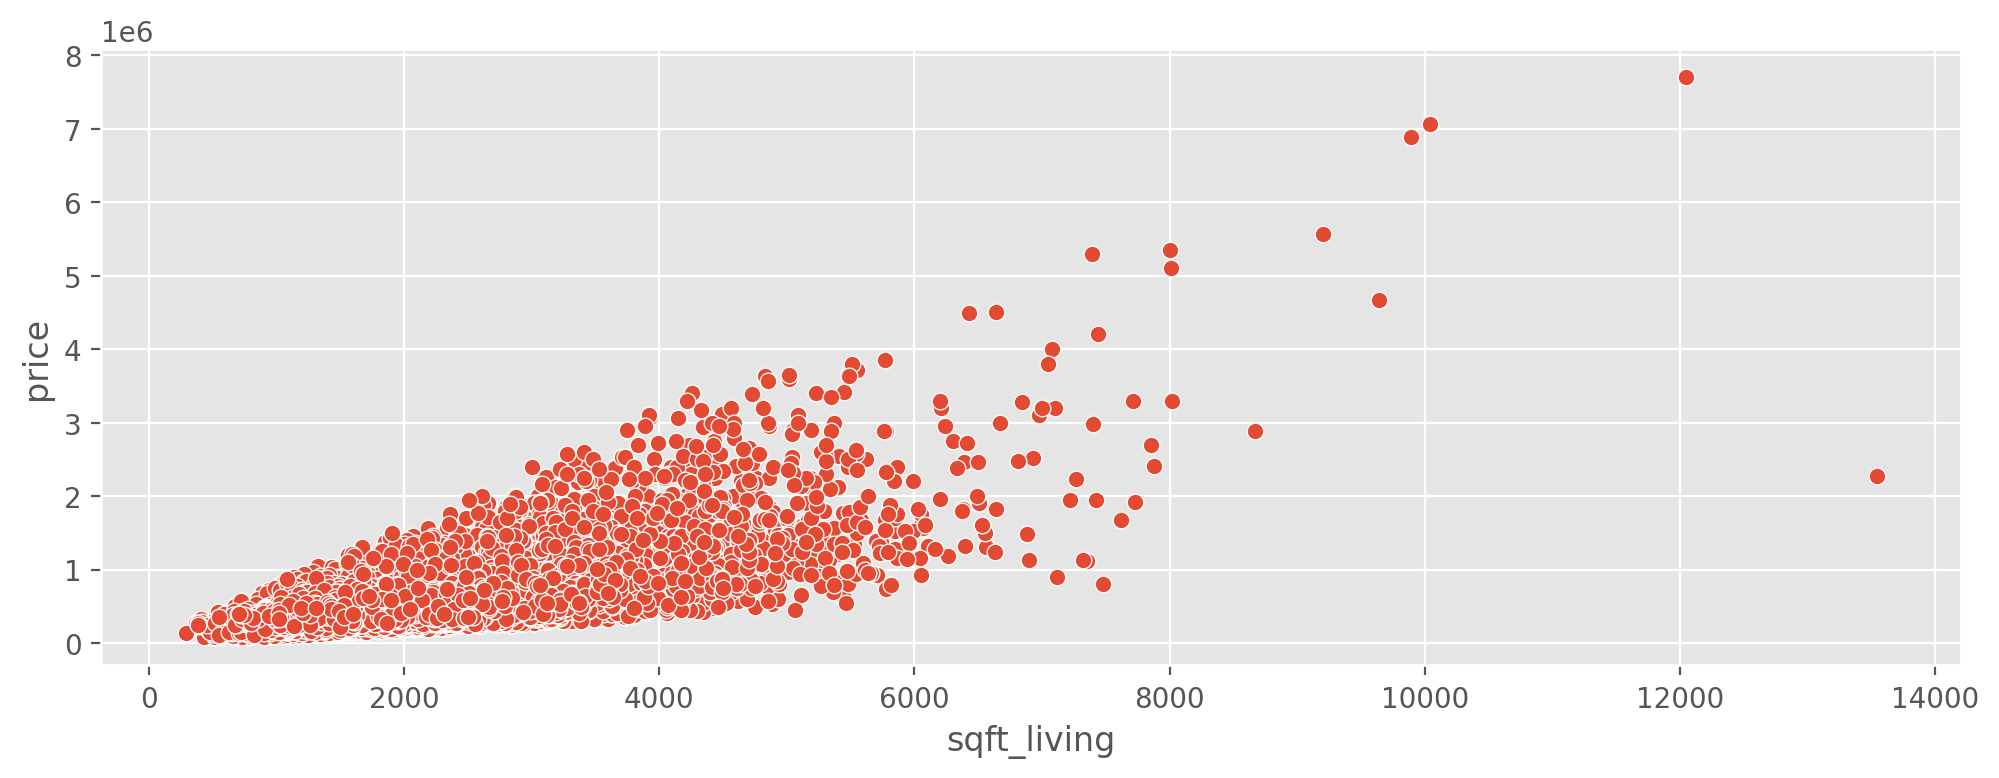

In [151]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot(data['sqft_living'], data['price'])

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

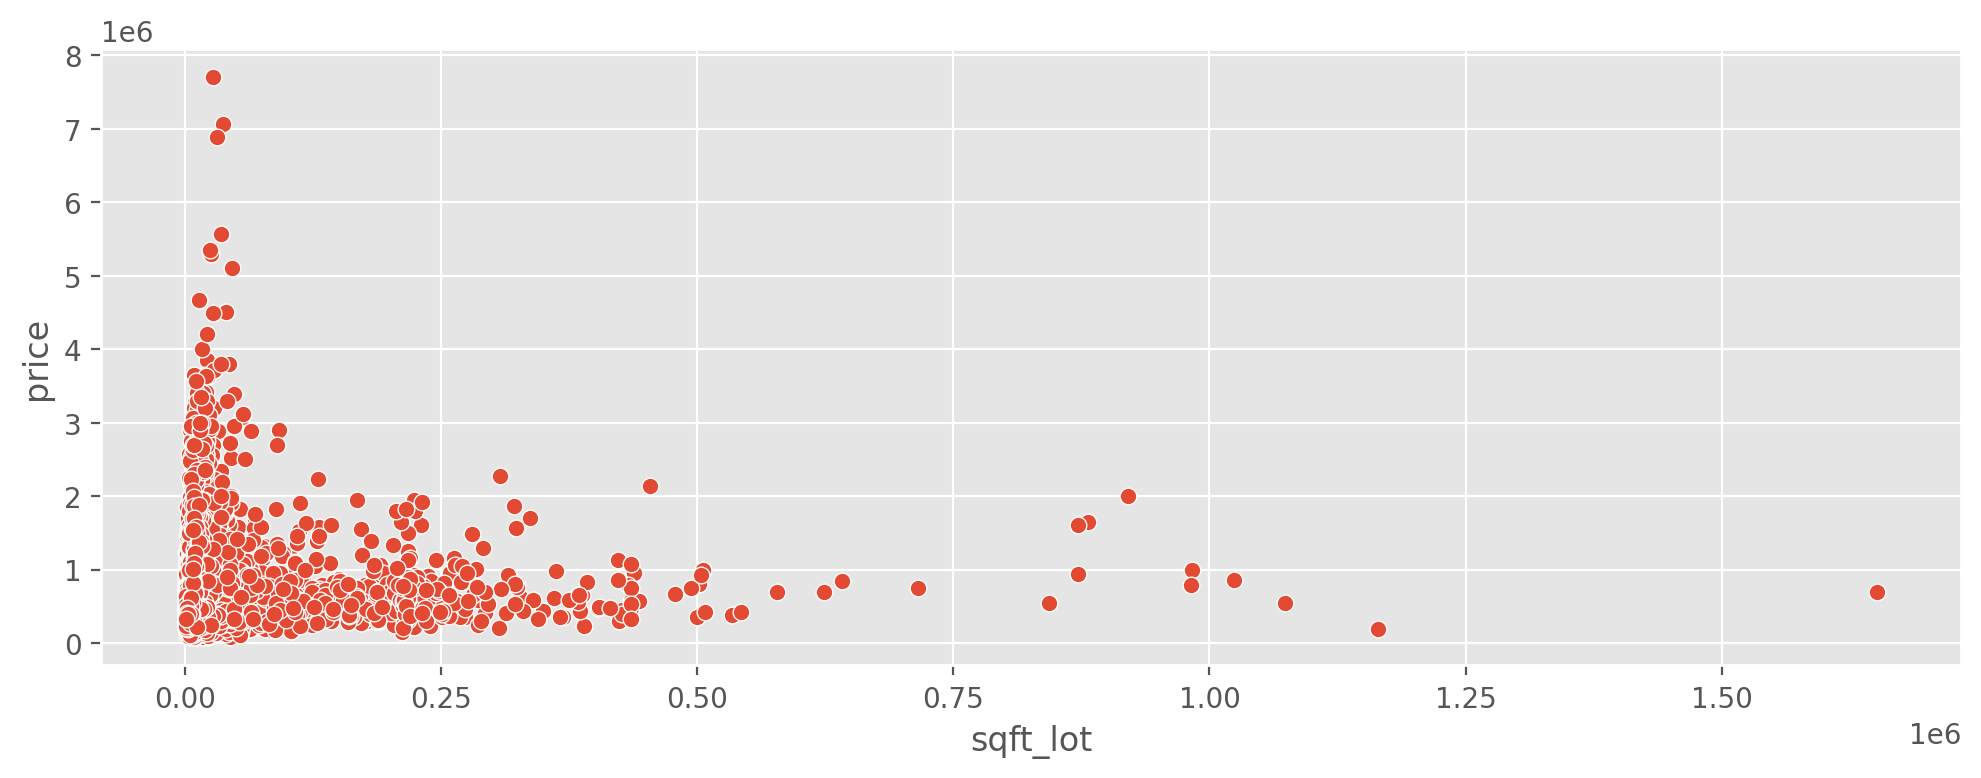

In [152]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot(data['sqft_lot'], data['price'])

<AxesSubplot:xlabel='floors', ylabel='price'>

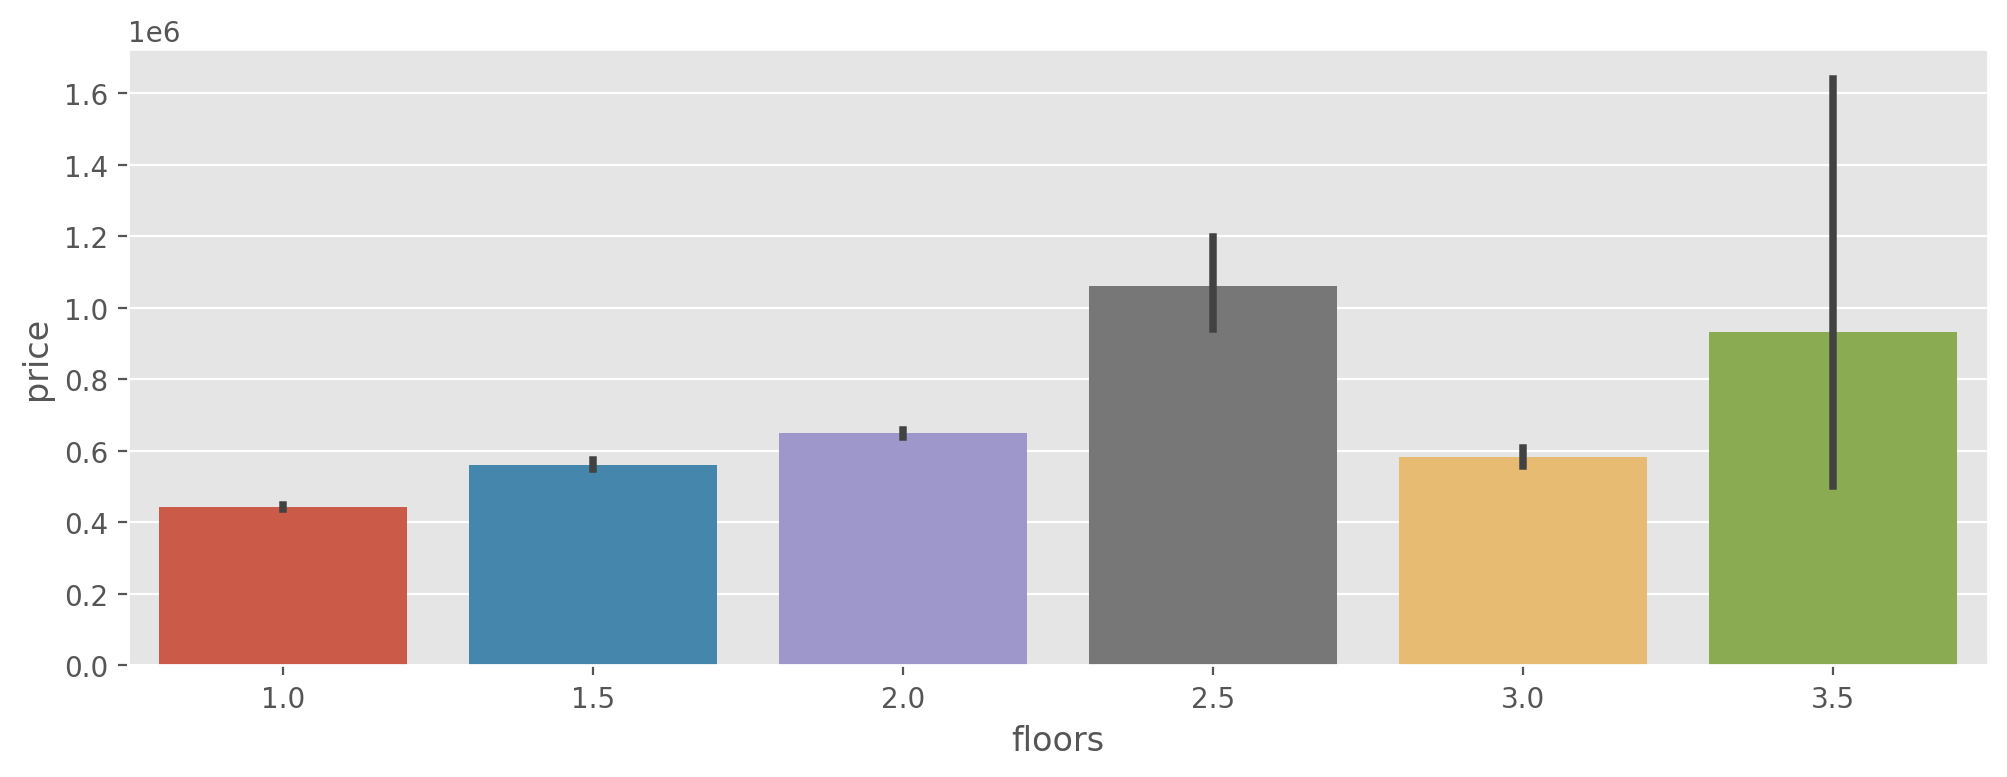

In [153]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot(data['floors'], data['price'])

<AxesSubplot:xlabel='condition', ylabel='price'>

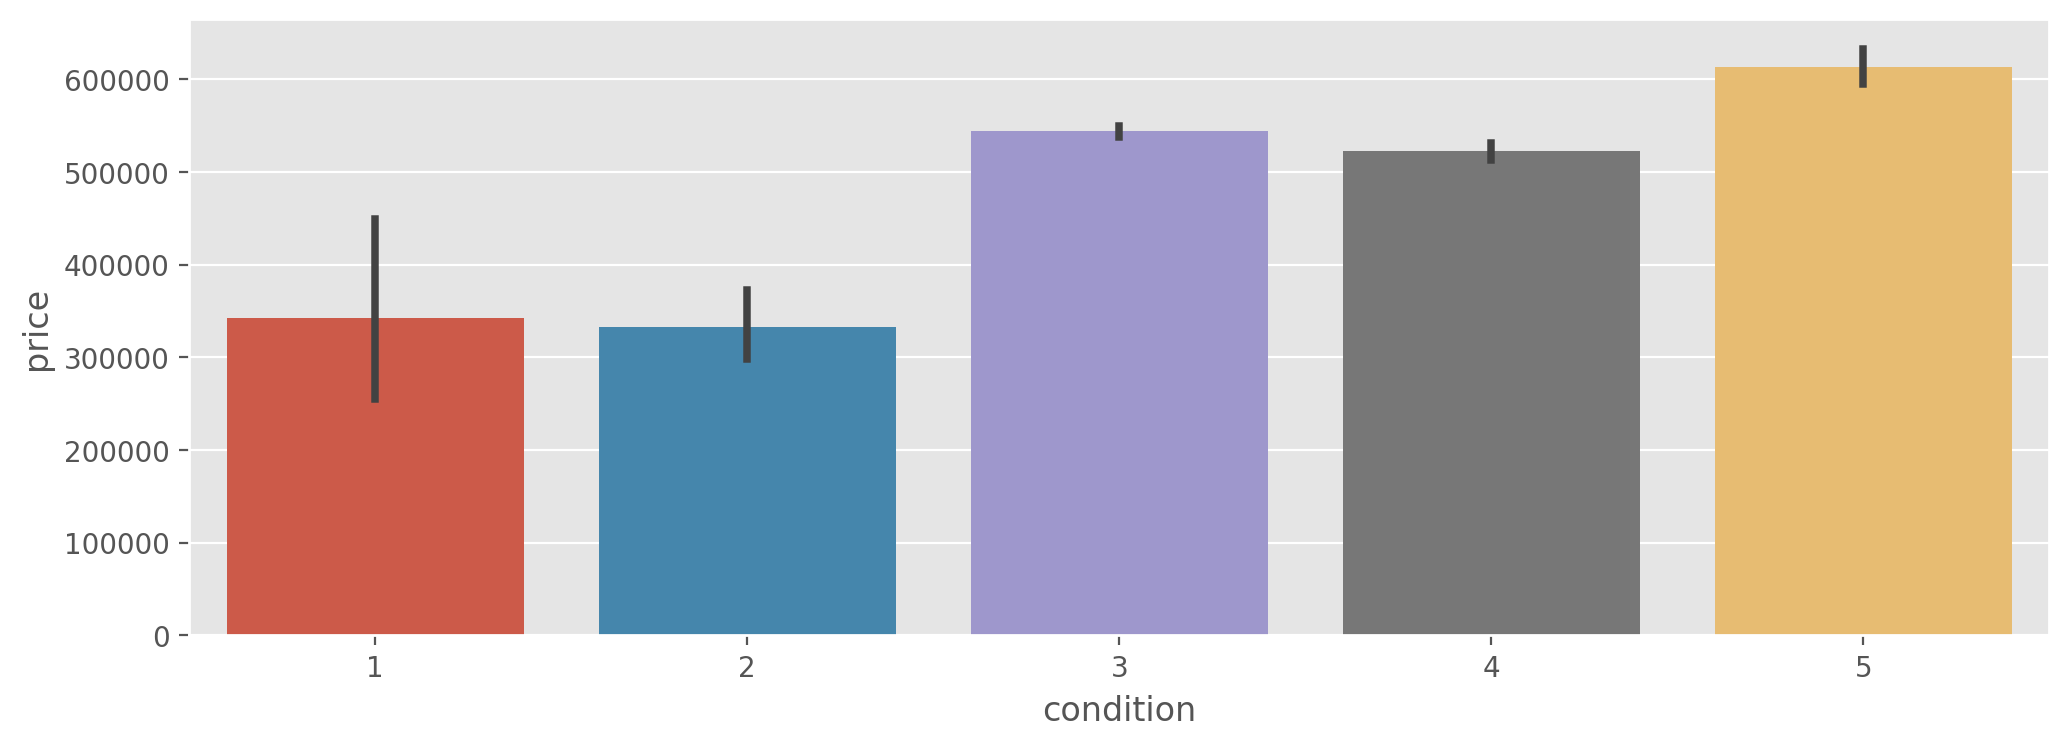

In [154]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot(data['condition'], data['price'])

<AxesSubplot:xlabel='waterfront', ylabel='price'>

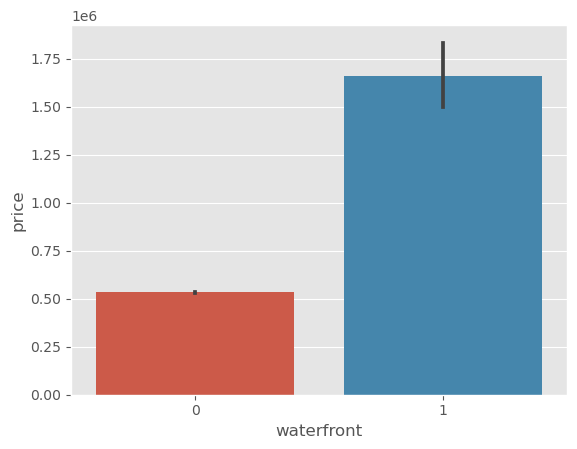

In [155]:
sns.barplot(data['waterfront'], data['price'])

<AxesSubplot:xlabel='view', ylabel='price'>

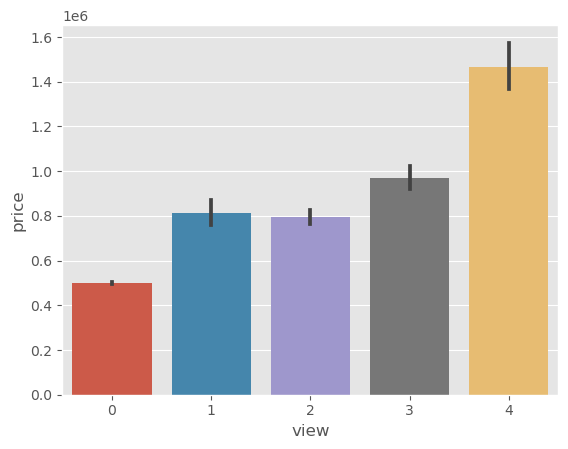

In [156]:
sns.barplot(data['view'], data['price'])

<AxesSubplot:xlabel='grade', ylabel='price'>

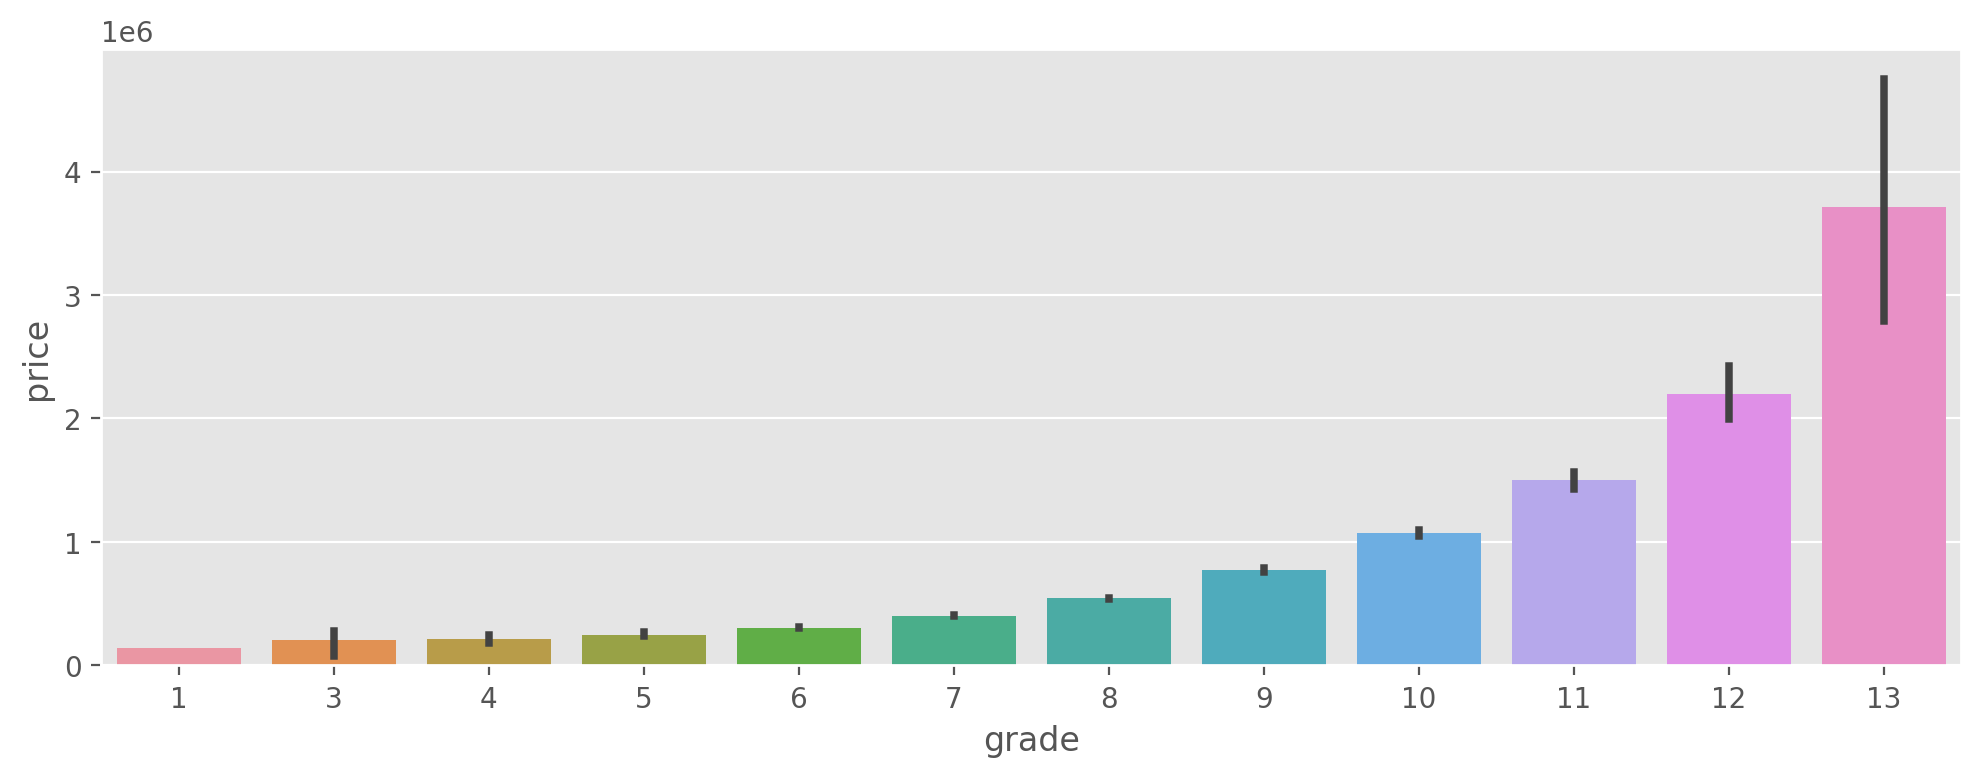

In [157]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot(data['grade'], data['price'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

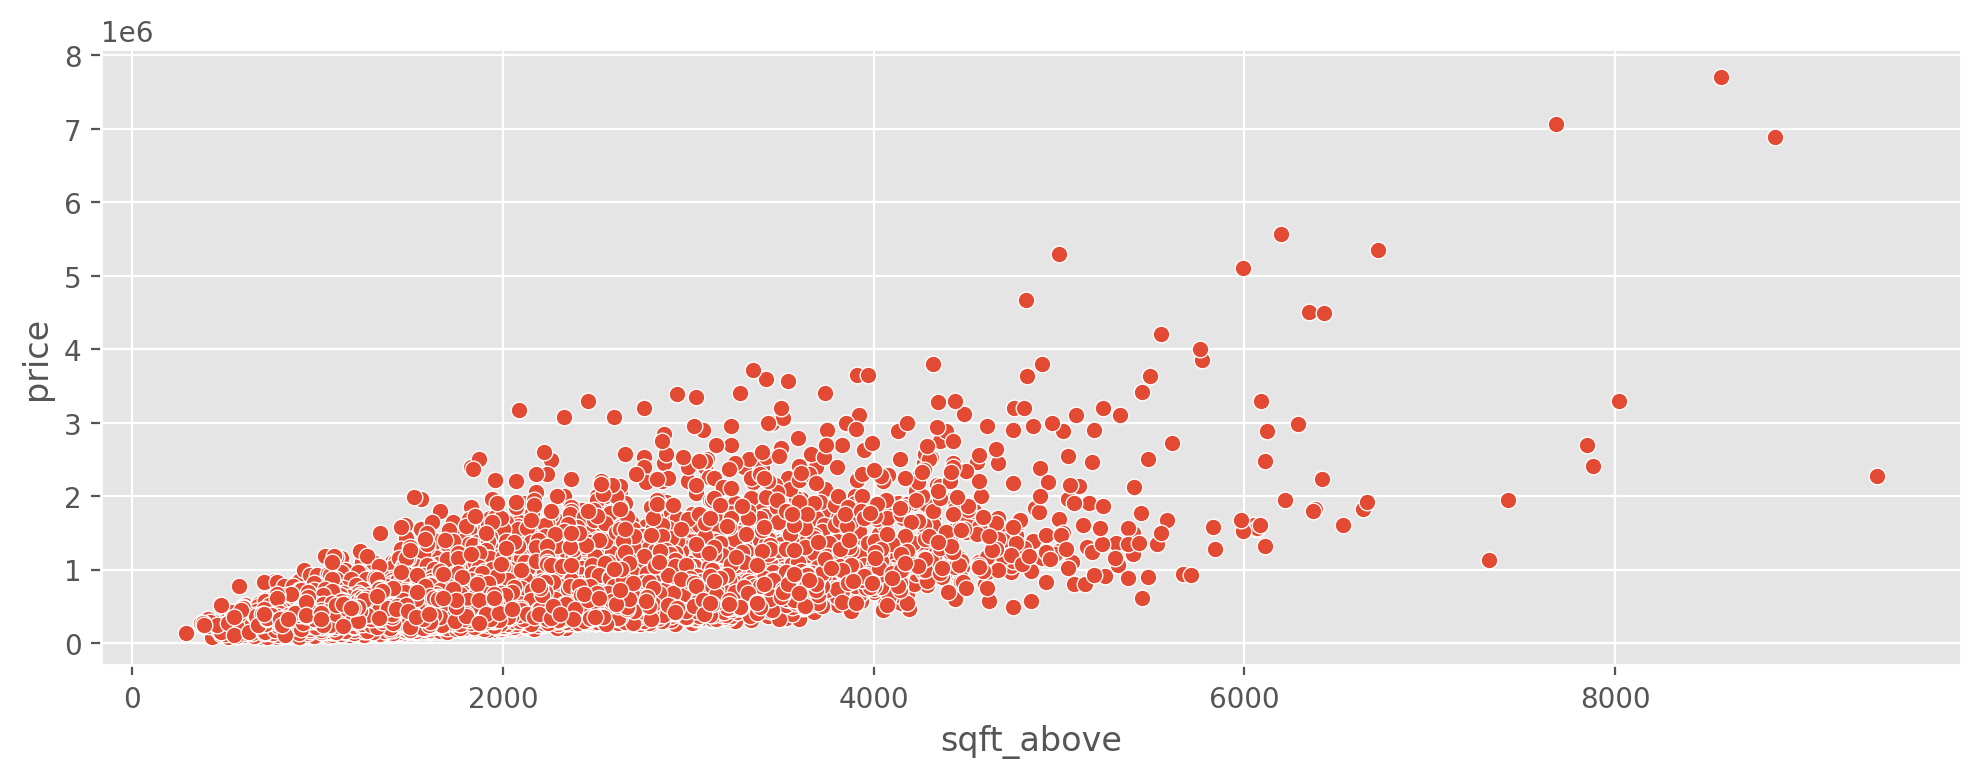

In [158]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot(data['sqft_above'], data['price'])

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

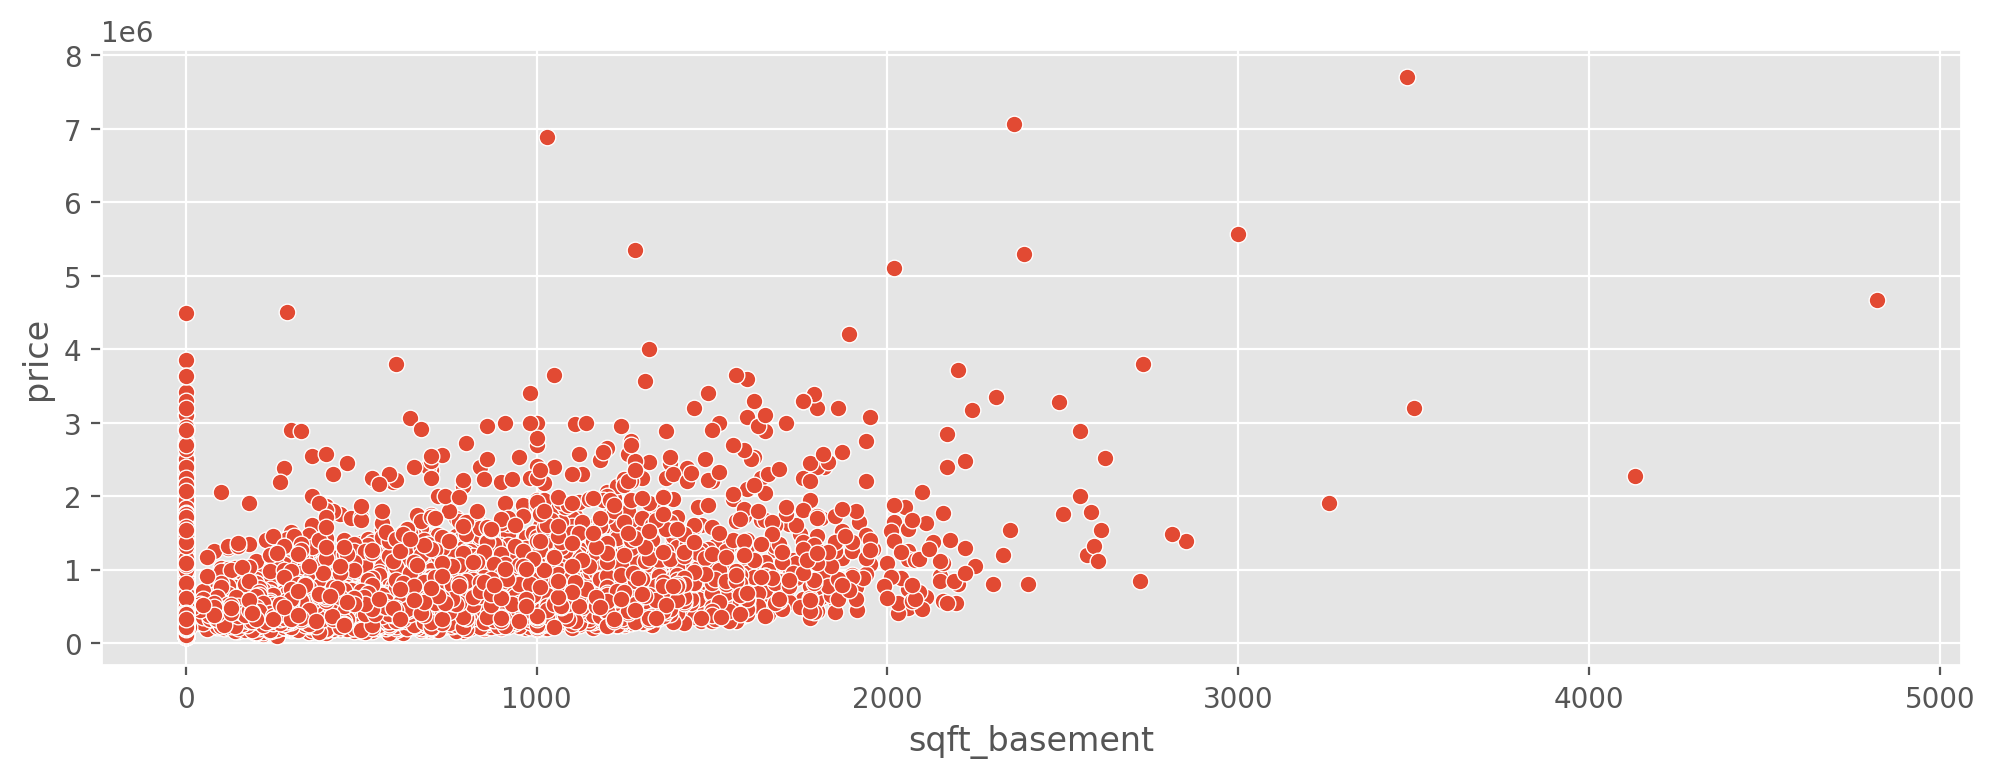

In [159]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot(data['sqft_basement'], data['price'])

<AxesSubplot:xlabel='yr_built', ylabel='price'>

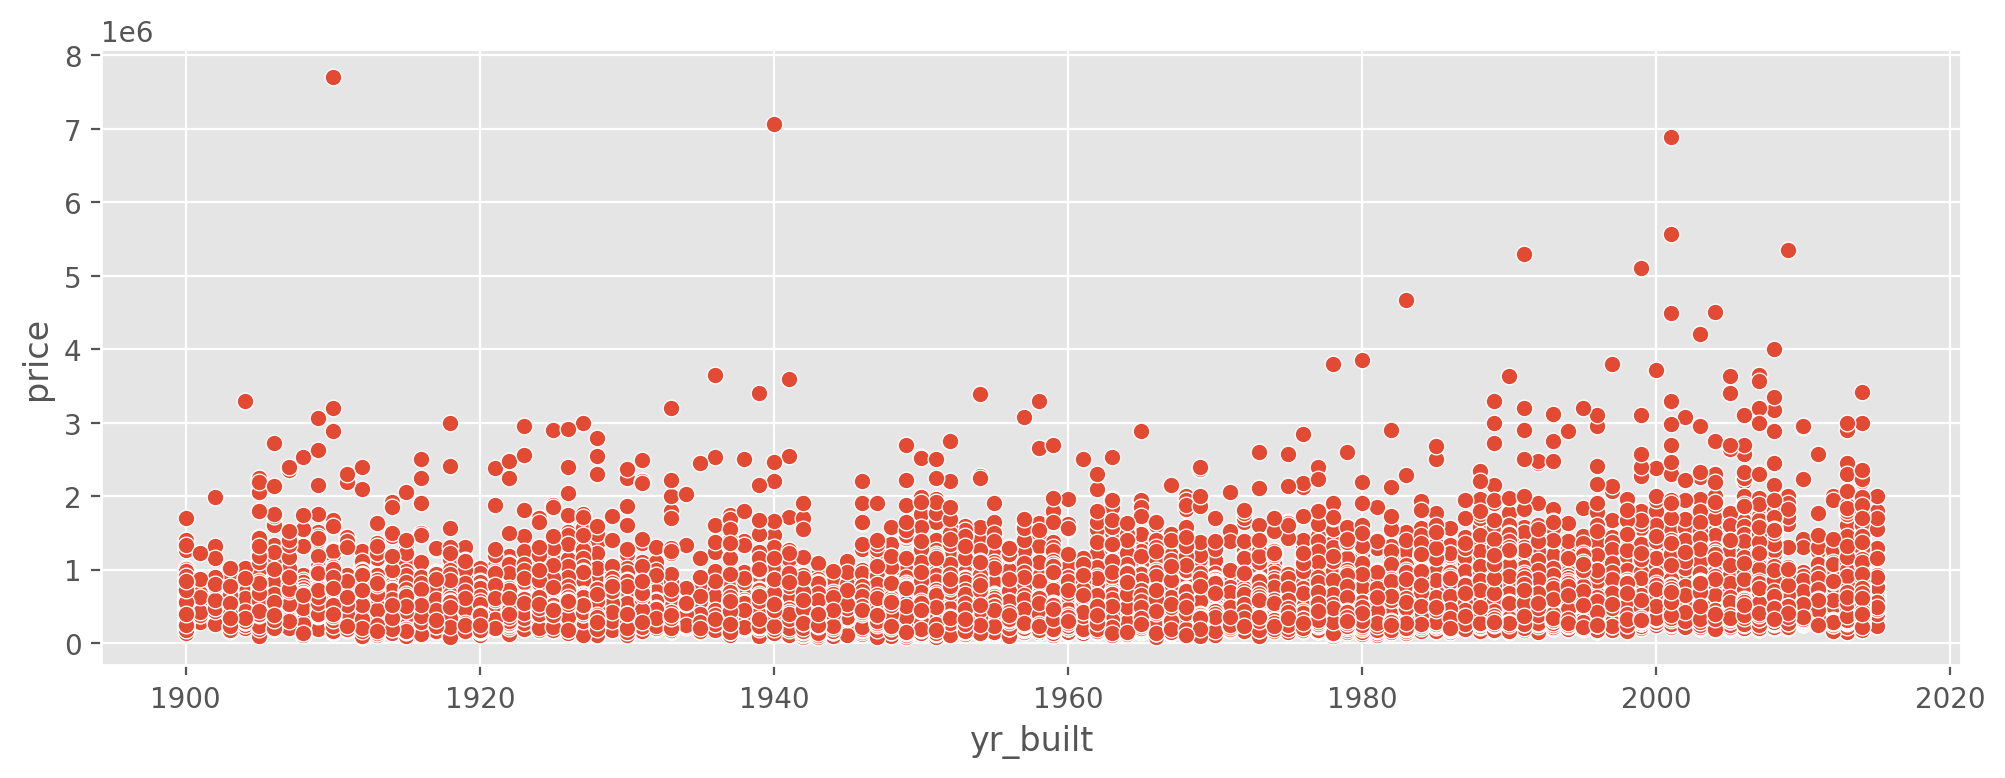

In [160]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot(data['yr_built'],data['price'])

In [161]:
def renew(x):
    if x == 0:
        return 0
    else:
        return 1

In [162]:
data['Is_renew'] = data['yr_renovated'].apply(renew)

<AxesSubplot:xlabel='Is_renew', ylabel='price'>

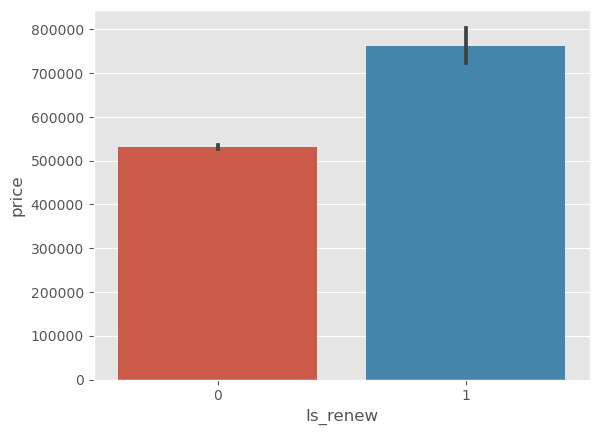

In [163]:
sns.barplot(data['Is_renew'], data['price'])

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

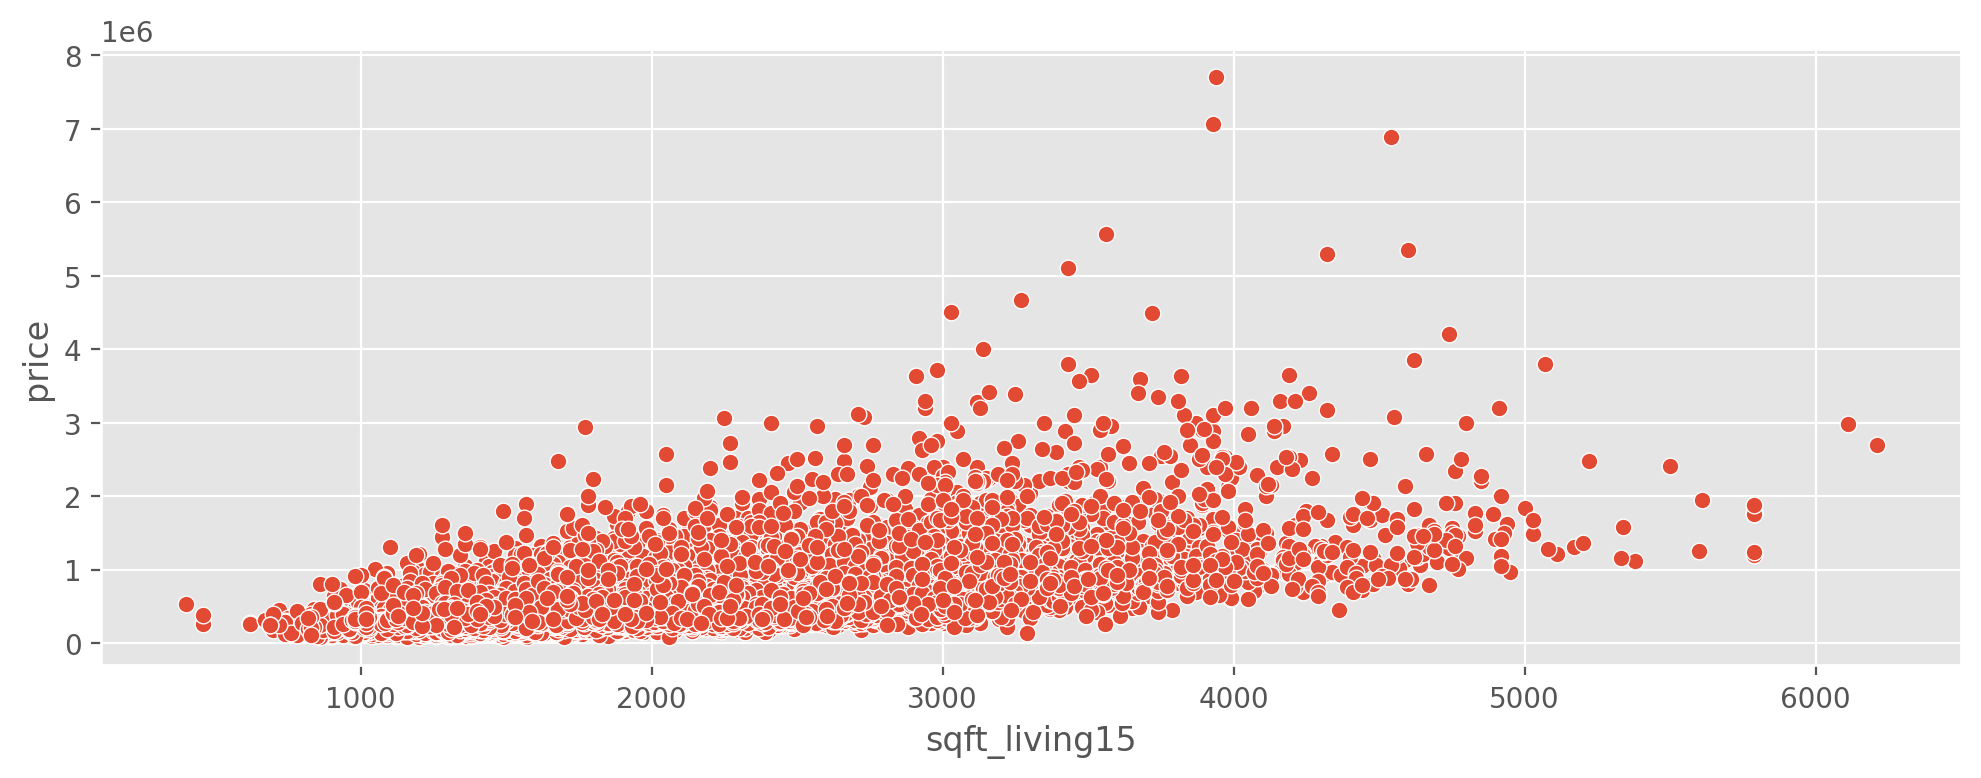

In [164]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot(data['sqft_living15'], data['price'])

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

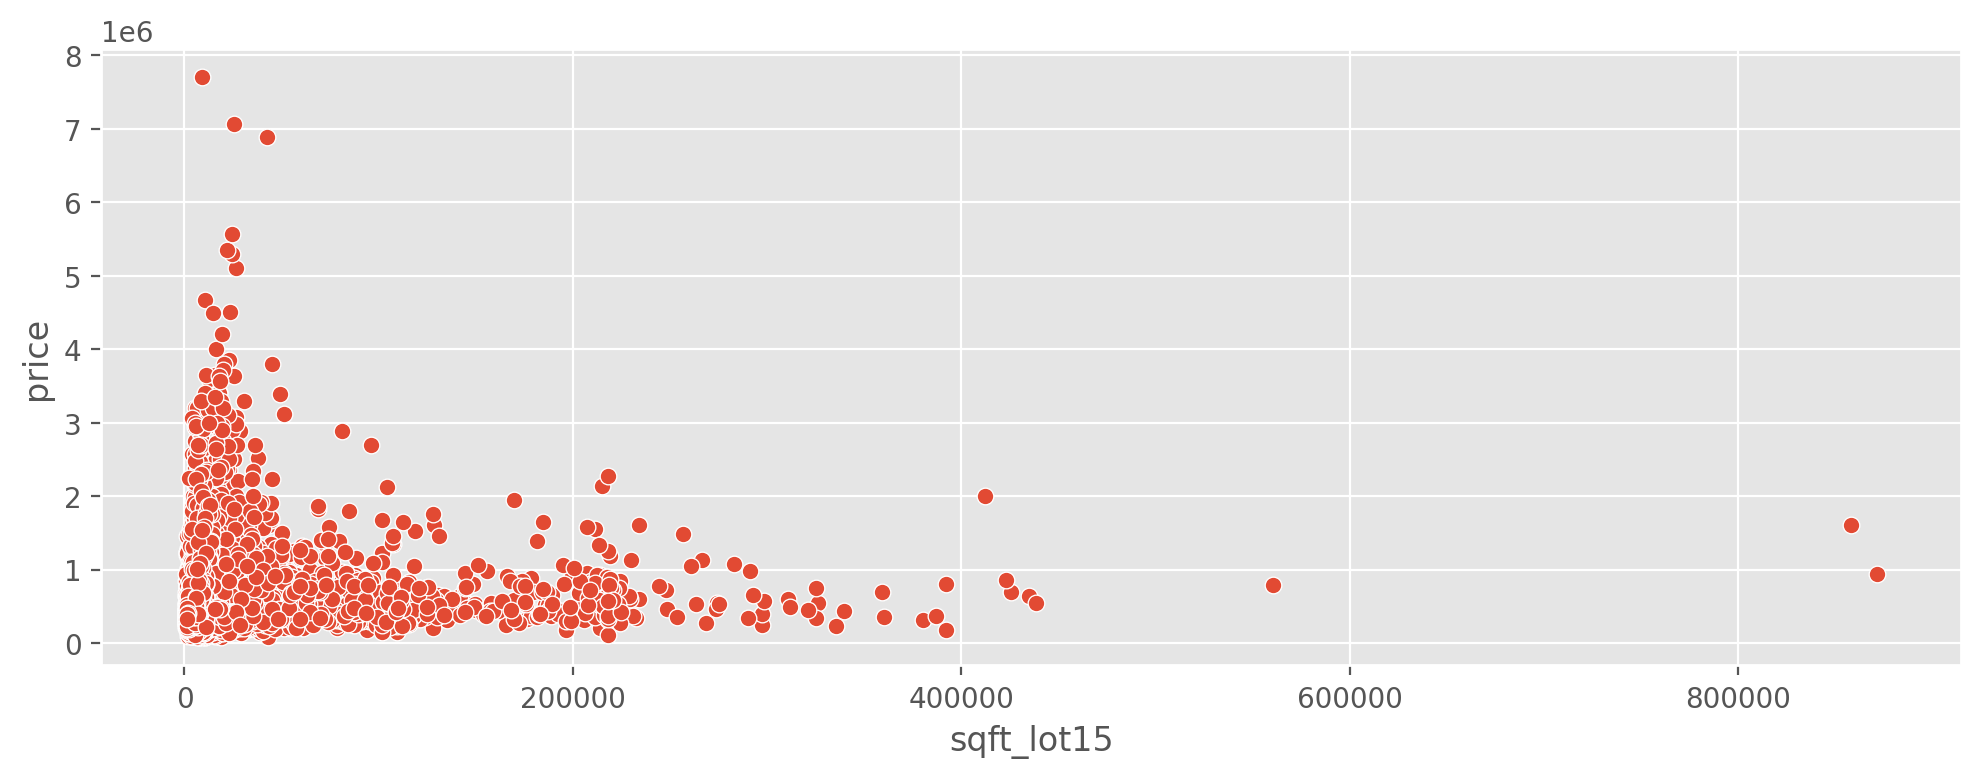

In [165]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot(data['sqft_lot15'], data['price'])

- bedrooms - Prices increase with increase in bedroom
- bathrooms - Prices increase with increase in bathrooms	
- sqft_living - Prices increase with increase in bathrooms 	
- sqft_lot - No pattern with respect to price
- floors - Prices increase with increase in bathrooms
- waterfront	- Price increase with waterfront
- view - Price increase with increase in view
- condition - Price increase with increase in view
- grade - Price increase with increase in grade
- sqft_above - Price increases slightly with increase in sqft_above
- sqft_basement - No pattern with respect to price
- sqft_living15 - No pattern with respect to price
- sqft_lot15 - No pattern with respect to price	
- Is_renew - Price increases if property is renovated


<AxesSubplot:>

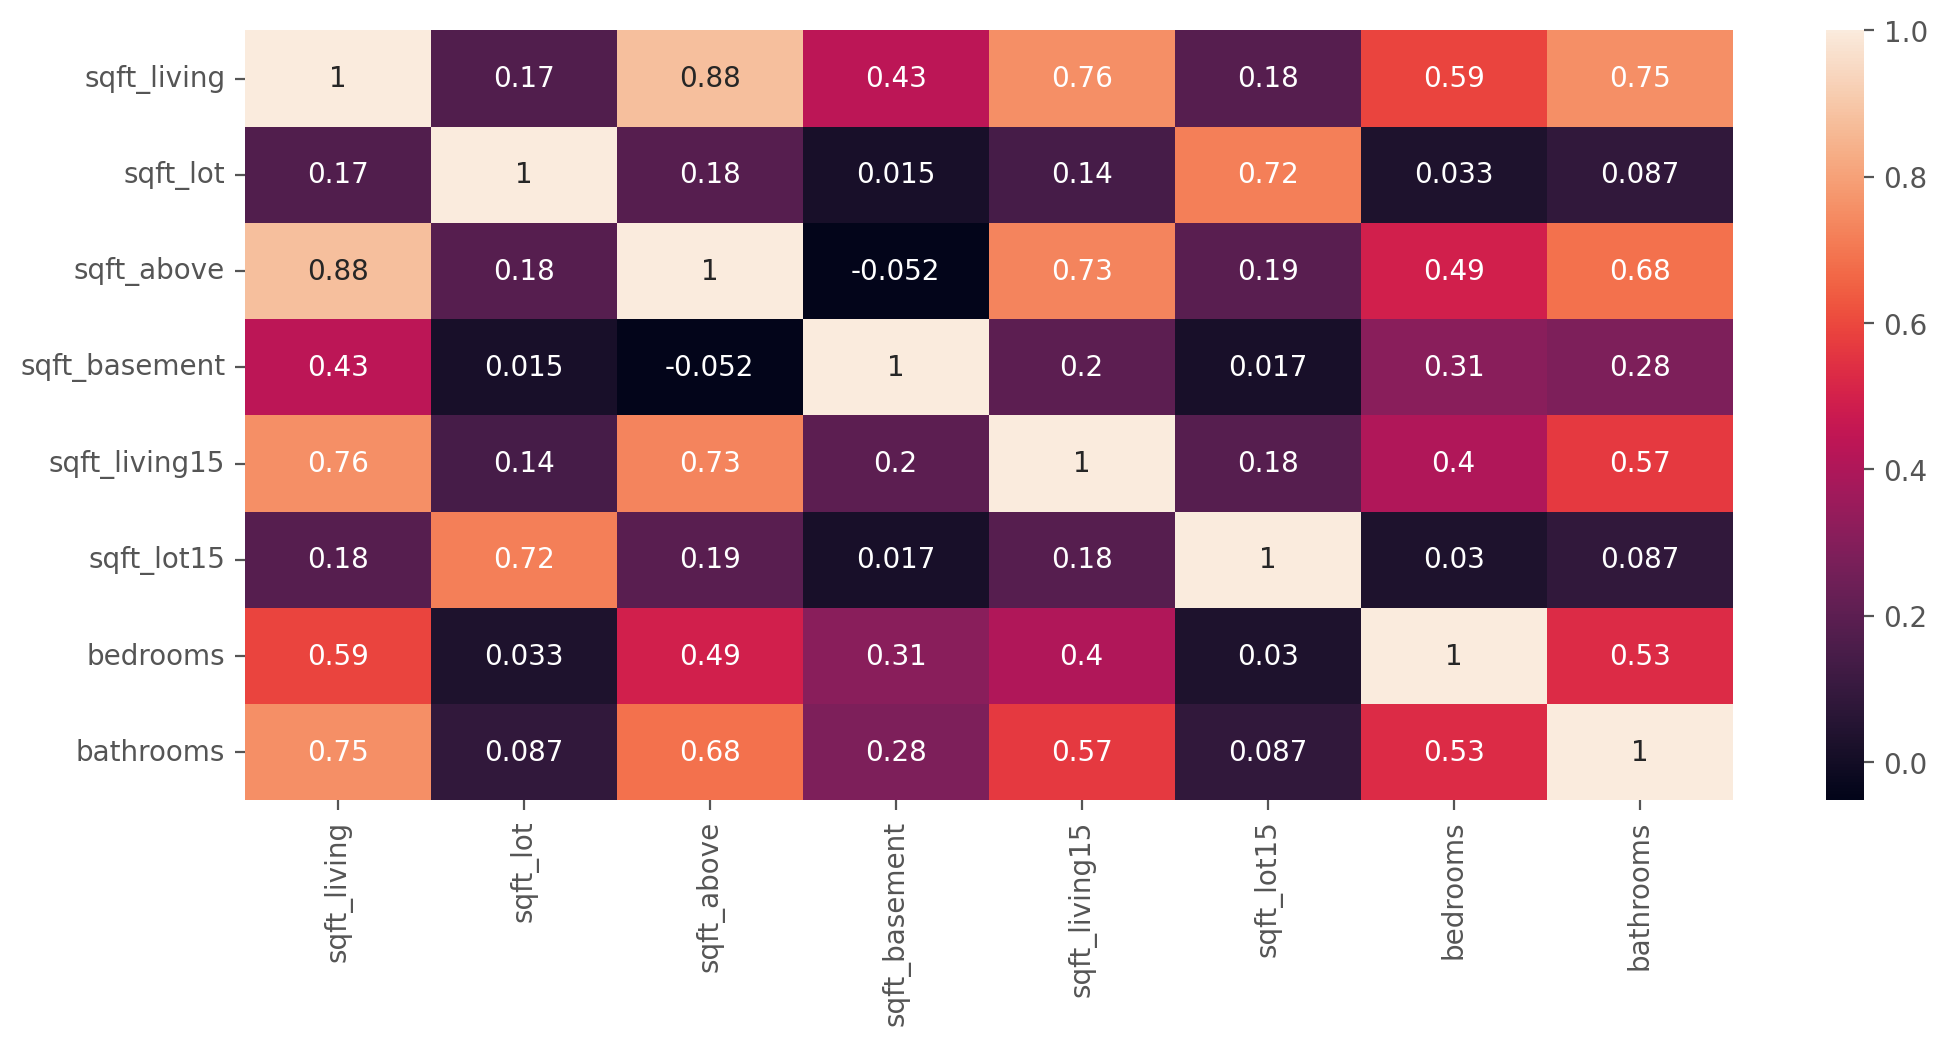

In [166]:
cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15','bedrooms','bathrooms']

plt.figure(figsize = (12,5), dpi = 200)
sns.heatmap(data[cols].corr(), annot = True)

In [167]:
# Adding new column is_basement to determine property with basements.
def is_basement(x):
    if x==0:
        return 0
    else:
        return 1
   
data['is_basement'] = data['sqft_basement'].apply(is_basement)

In [169]:
data['age'] = data['date'].dt.year-data['yr_built']

In [170]:
#adding new column square which give more magnified value 
data['square'] = data['sqft_living'].apply(lambda x: x**2)

In [171]:
# using one hot encoding for zipcode
dummy = pd.get_dummies(data['zipcode'])

In [172]:
data = pd.concat([dummy, data], axis = 1)
data

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Is_renew,is_basement,New_zip,age,square
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0,66.0,59,1392400
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,55.0,63,6604900
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0,16.0,82,592900
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,1,58.0,49,3841600
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0,37.0,28,2822400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0,0,42.0,5,2340900
21609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0,0,60.0,1,5336100
21610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0,0,59.0,5,1040400
21611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0,0,15.0,11,2560000


In [189]:
cols = ['sqft_living','waterfront','view','grade','Is_renew','is_basement','square',98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98198,98199]

X = data[cols]

Y = data[['price']]

In [190]:
X.head()

,sqft_living,waterfront,view,grade,Is_renew,is_basement,square,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98198,98199
70,4770,0,0,11,0,1,22752900,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,1260,0,0,7,0,0,1587600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,2750,0,0,7,0,1,7562500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
73,2380,0,0,8,0,0,5664400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,1790,0,0,7,0,1,3204100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [191]:
Y.head()

,price
70,1040000.0
71,325000.0
72,571000.0
73,360000.0
74,349000.0


In [192]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [193]:
print('Training Data shape   : ', x_train.shape)
print('Training Labels shape : ', y_train.shape)
print('Testing Data shape    : ', x_test.shape)
print('Testing Labels shape  : ', y_test.shape)

Training Data shape   :  (16023, 76)
Training Labels shape :  (16023, 1)
Testing Data shape    :  (5342, 76)
Testing Labels shape  :  (5342, 1)


In [194]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [195]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training set score : ', r2_score(y_train, pred_train))
print('Testing Set score  : ', r2_score(y_test, pred_test))

Training set score :  0.8225437082638736
Testing Set score  :  0.8165921262272223
